# Project 1

 This project was something I decided to work on as an homage to my love of both sports and my heritage. As I come from Bulgaria, I decided it is most apt to focus my first project towards the success of my country during the Olympics games, though the focus will largely be on the Summer games due to circumstances that will be described later on. 

All this data was found on Kaggle thanks to the helpful links provided by Dr. Benedict, and sourced by the International Olympic Committee Research and Reference Service, published by The Guardian. https://www.kaggle.com/datasets/the-guardian/olympic-games/data

In [ ]:
# Importing the necessary libraries, which are few and simple.
import pandas as pd
import matplotlib.pyplot as plt

#### Storing the datasets into separate frames. Then we will clean them down to only show results that are about Bulgaria. This way we don't have to deal with excess data from other countries, and can focus on just Bulgaria.

In [2]:
dictionary = pd.read_csv('dictionary.csv')
sum_results = pd.read_csv('summer.csv')
win_results = pd.read_csv('winter.csv')

In [16]:
# This is a basic showing of how the new data frames will be cut down to only show Bulgarian results,
# and the process is repeated below.
dictionary = dictionary[dictionary['Country'] == 'Bulgaria']
dictionary.head()

,Country,Code,Population,GDP per Capita
29,Bulgaria,BUL,7177991.0,6993.47736


In [6]:
sum_results_BUL = sum_results[sum_results['Country'] == 'BUL']
win_results_BUL = win_results[win_results['Country'] == 'BUL']
win_results_BUL.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
1974,1980,Lake Placid,Skiing,Cross Country Skiing,"LEBANOV, Ivan",BUL,Men,30KM Mass Start,Bronze
3174,1998,Nagano,Biathlon,Biathlon,"DAFOVSKA, Ekaterina",BUL,Women,15KM,Gold
3620,2002,Salt Lake City,Biathlon,Biathlon,"NIKOULTCHINA, Irina",BUL,Women,10KM Pursuit,Bronze
3887,2002,Salt Lake City,Skating,Short Track Speed Skating,"RADANOVA, Evgenia",BUL,Women,1500M,Bronze
3923,2002,Salt Lake City,Skating,Short Track Speed Skating,"RADANOVA, Evgenia",BUL,Women,500M,Silver


### Once only medalists from Bulgaria are left, we can now sort them out by year, and start counting them up!

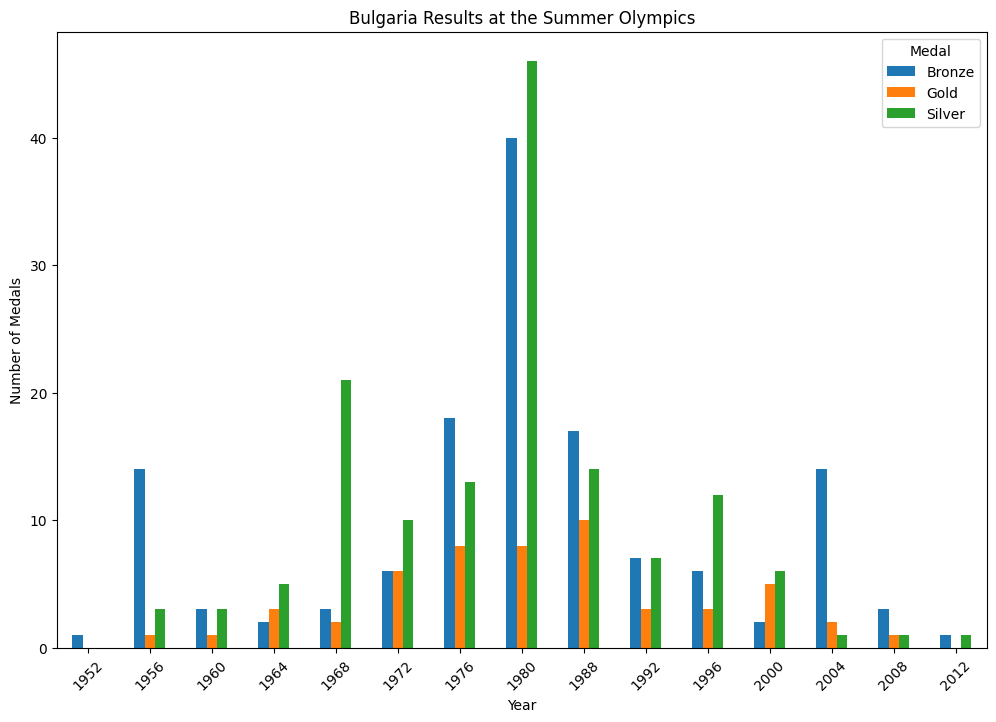

In [ ]:
# Grouping the data frame by year and medals for those years, then counting them up.
medal_counts_sum = sum_results_BUL.groupby(['Year', 'Medal']).size().reset_index(name='Medal_Counts')

#Pivot so the medals become columns
pivot_sum = medal_counts_sum.pivot(index='Year', columns='Medal', values='Medal_Counts').fillna(0)

# Chart for results during summer each year
pivot_sum.plot(kind='bar', figsize=(12,8))

plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('Bulgaria Results at the Summer Olympics')
plt.xticks(rotation=45)
plt.show()

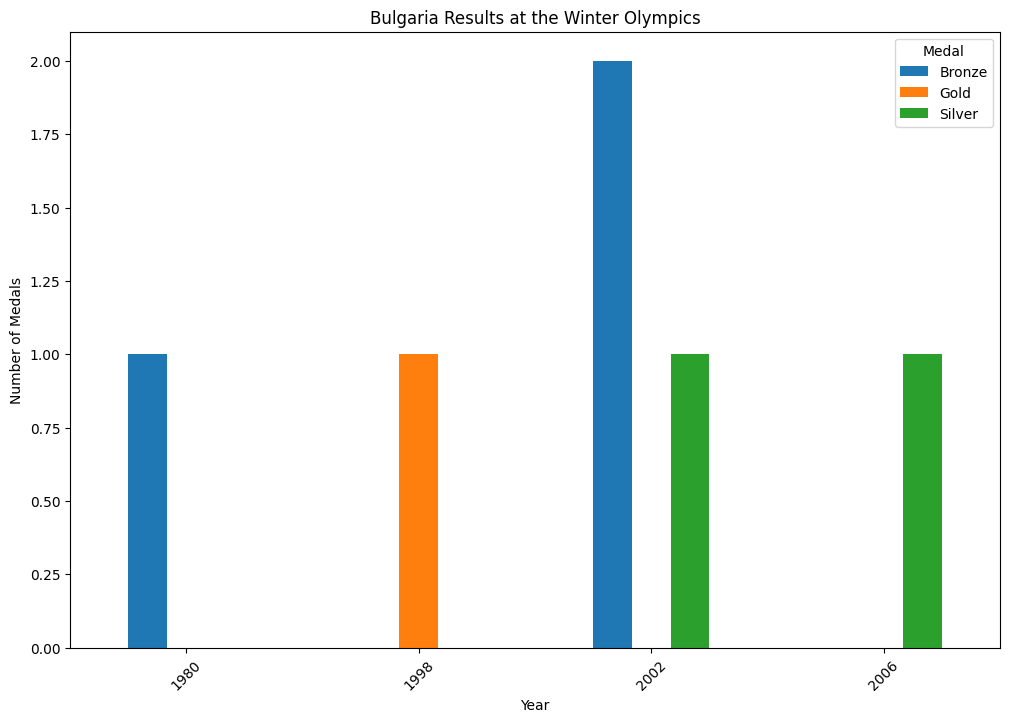

In [ ]:
# Same as the summer procedures, just for winter this time.
medal_counts_win = win_results_BUL.groupby(['Year', 'Medal']).size().reset_index(name='Medal_Counts')

#Pivot so the medals become columns
pivot_win = medal_counts_win.pivot(index='Year', columns='Medal', values='Medal_Counts').fillna(0)

# Chart for results during winter each year
pivot_win.plot(kind='bar', figsize=(12,8))

plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('Bulgaria Results at the Winter Olympics')
plt.xticks(rotation=45)
plt.show()

As it is becoming obvious, we have been far more successful at the Summer Olympics than in the Winter Olympics over the course of Bulgaria's participation. There are some differences in that the country did not start participating in the winter olympics until much later than the summer ones, but a lot of the gaps seen above are simply due to unsuccessful years. Along with that, far less athletes are sent every year for the Winter Olympics than the Summer ones, so I added the winter chart just to show the disparity and from now on will be focusing on summer results.

During the 1940s, there was lackluster participation due to World War 2 hampering the existence of the Olympics, then during the 1980s, due to the Cold War, Soviet-aligned countries boycotted some Olympics games (in 1984, though in 1980 the USA boycotted the Olympics due to them being held in Moscow).

Our most successful year in terms of medal count did come in the 1980 Summer Olympics, where Bulgaria placed 3rd overall, though the highest gold medal count came in 1988 Summer. In 2016 Bulgaria scored no medals, hence why it is not present on this graph, though in the last two Summer showings have produced a few gold medals once again.

### For comparison, below I will add totals and the results of other Balkan countries at the olympics, as our nearest geographical neighbors.